Regression Problems: Numerical Problems
Simple LR: One Input and One Output
Multiple LR : More than one inputs and one output
Polynomial LR : If data is not linear then it is used
Regularization : These are the terms used for improving LR

-> y = mx + b
-> m = slope
-> c = intercept
-> y = wx + b
-> w is weight and b is the bias
. The intercept is the value from where the line starts


Loss Funtion measures how far an estimated value is from its true value

Loss = (1/n)sigma(y_i - y^_i)^2 this will start from 1 to n

### Gradient Descent
1. It will find the best parameters at Global Minimum Point
2. It is an optimization algorithm used for minimizing the loss function in various ML algorithms. It is used for updating the parameters of learning model.
3. m = m - LDm where m is slope, L is the learning rate and Dm is the partial derivative of loss function w.r.t m.
4. c = c - LDc where m is the slope, L is the Learning rate and Dc is the partial derivative of loss function w.r.t c.
5.  Cost function and loss function are same
6. Dm = -2/n(sumof(x_i(y_i - y_pred)) and Dc = -2/n(sumof(yi-y_pred))


### Linear Regression

In [2]:
import numpy as np

In [3]:
# class Linear_Regression:
#
#     def __init__(self,learning_rate,no_of_iterations):
#         self.learning_rate = learning_rate
#         self.no_of_iterations = no_of_iterations
#
#     def fit(self,X,Y):
#         self.m,self.n = X.shape # no_of_rows_columns
#         self.w = np.zeros(self.n) # n is no of columns
#         self.b = 0
#         self.X = X
#         self.Y = Y
#         #implementing Gradient_Descent
#         for i in range(self.no_of_iterations):
#             self.update_weights()
#
#     def update_weights(self):
#         Y_pred = self.predict(self.X)
#         dw = -(2*(self.X.T).dot(self.Y - Y_pred))/self.m
#         db = -2*np.sum(self.Y-Y_pred)/self.m
#         #update weights
#         self.w = self.w-self.learning_rate*dw
#         self.b = self.b - self.learning_rate*db
#     def predict(self,X):
#         return X.dot(self.w) + self.b


In [7]:
!pip install sklearn


  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://g

In [8]:
import copy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [9]:
data = pd.read_csv('Student_Performance.csv')
data.head()

Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0

In [12]:
categorical_columns = ['Extracurricular Activities']
numerical_columns = ['Hours Studied','Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']

In [13]:
label_encoder = LabelEncoder()
data[categorical_columns] = data[categorical_columns].apply(label_encoder.fit_transform)
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
data.head()

Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0       0.775188         1.704176                           1     1.456205   
1      -0.383481         0.723913                           0    -1.492294   
2       1.161410        -1.063626                           1     0.276805   
3       0.002742        -1.005963                           1    -0.902594   
4       0.775188         0.320275                           0     0.866505   

   Sample Question Papers Practiced  Performance Index  
0                         -1.249754               91.0  
1                         -0.900982               65.0  
2                         -0.900982               45.0  
3                         -0.900982               36.0  
4                          0.145333               66.0

In [14]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [17]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
print('Shape of X: ',X.shape)
print('Shape of Y: ',Y.shape)

Shape of X:  (10000, 5)
Shape of Y:  (10000,)


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)
print('X_train Shape',X_train.shape)
print('X_test Shape',X_test.shape)
print('y_train Shape',y_train.shape)
print('y_test Shape',y_test.shape)

X_train Shape (7500, 5)
X_test Shape (2500, 5)
y_train Shape (7500,)
y_test Shape (2500,)


In [27]:
def compute_model_output(x,w,b):
    m,n = x.shape # m is rows and n is columns their numbers
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = np.dot(w,x.iloc[i].to_numpy()) + b
    return f_wb


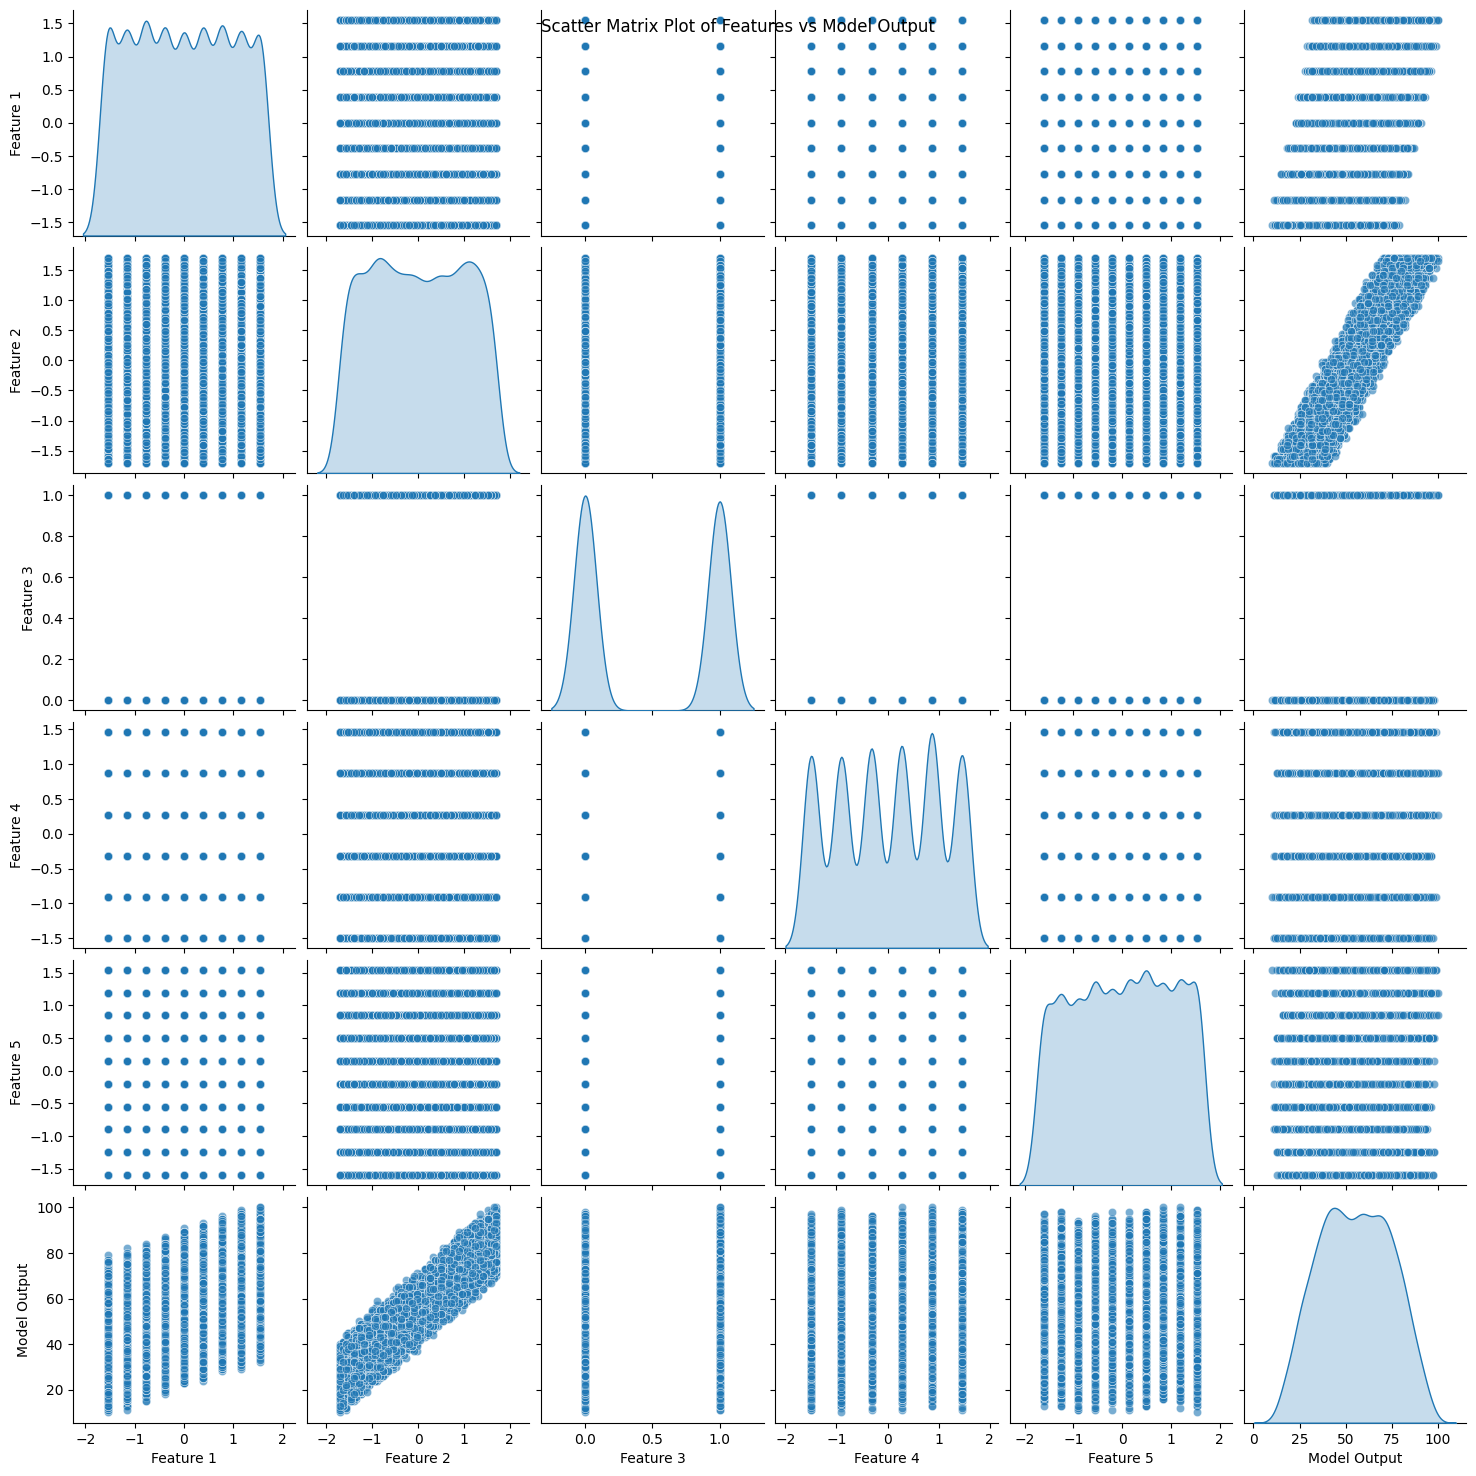

In [30]:
import seaborn as sns
w = np.array([1000,1000,1000,1000,1000])
b = 10
tmp_f_wb = compute_model_output(X_train,w,b)
df = pd.DataFrame(np.hstack((X_train, y_train.to_numpy().reshape(-1, 1))), columns=['Feature 1', 'Feature 2', 'Feature 3','Feature 4','Feature 5', 'Model Output'])

# Create a scatter matrix plot
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Scatter Matrix Plot of Features vs Model Output')
plt.show()

In [58]:
def compute_cost(x,y,w,b):
    m = len(y)
    n = len(w)
    cost = 0
    reg = 0
    lambda_ = 1
    for i in range(m):
        f_wb = np.dot(w,x[i]) + b
        cost += (f_wb-y[i])**2
    cost = np.sum(cost)/(2*m)
    reg = (np.sum(w**2)*lambda_)/(2*m)
    reg = (reg*lambda_)/(2*m)
    total_cost = reg + cost
    return total_cost

In [59]:
w = np.array([1,1,1,1,1])
b = 1
cost = compute_cost(X_train.to_numpy(),y_train.to_numpy(),w,b)
print(cost)

1599.1579217940719


In [60]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_w = np.zeros_like(w,dtype=np.float64)
    dj_b = 0
    lambda_ = 1
    reg = 0
    for i,sample in enumerate(x):
        f_wb = np.dot(w,sample) + b
        dj_dw_i = (f_wb - y[i])*sample
        dj_db_i = f_wb-y[i]
        dj_w += dj_dw_i
        dj_b += dj_db_i

    reg = lambda_*w
    dj_dw = dj_w/m
    dj_db = dj_b/m
    return dj_dw,dj_db

In [61]:

initial_w = np.array([0,0,0,0,0])
initial_b = 0
tmp_dj_dw,tmp_dj_db = compute_gradient(X_train.to_numpy(),y_train.to_numpy(),initial_w,initial_b)
print(tmp_dj_dw,tmp_dj_db)

[ -6.95212583 -17.46017113 -27.38253333  -1.01691527  -1.53894142] -55.12213333333333


In [63]:
import math
def gradient_descent(x,y,w_in,b_in,alpha,num_of_iterations,compute_cost,compute_gradient):
    m = len(x)
    J_history = []
    w_history = []
    b = b_in
    w = copy.deepcopy(w_in)

    for i in range(num_of_iterations):
        dj_dw,dj_db = compute_gradient(x,y,w,b)
        b -= alpha*dj_db
        w -= alpha*dj_dw.astype(float)

        cost = compute_cost(x,y,w,b)
        print("Cost :",cost)
        J_history.append(float(cost))
        if i%10000 or i==num_iterations - 1:
            w_history.append(w)
            print(f'Iteration: {i:6}: cost {float(J_history[-1]):10.8f}')

    return w,b,J_history,w_history


In [65]:
w=np.array([[0,0,0,0,0]],dtype=np.float64)
b=0
alpha = 0.0002  # Learning rate
num_iterations=100000
w_final,b_final,J_hist,w_hist = gradient_descent(X_train.to_numpy(),y_train.to_numpy(),w,b,alpha,num_iterations,compute_cost,compute_gradient)
print(f'w found by gradient descent: {w_final}, b found by gradient descent: {b_final}')
#2.0932

Cost : 1704.513402578999
Cost : 1703.684957874901
Iteration:      1: cost 1703.68495787
Cost : 1702.8569323400309
Iteration:      2: cost 1702.85693234
Cost : 1702.0293257601322
Iteration:      3: cost 1702.02932576
Cost : 1701.2021379210676
Iteration:      4: cost 1701.20213792
Cost : 1700.3753686088048
Iteration:      5: cost 1700.37536861
Cost : 1699.549017609433
Iteration:      6: cost 1699.54901761
Cost : 1698.7230847091375
Iteration:      7: cost 1698.72308471
Cost : 1697.8975696942268
Iteration:      8: cost 1697.89756969
Cost : 1697.072472351122
Iteration:      9: cost 1697.07247235
Cost : 1696.2477924663176
Iteration:     10: cost 1696.24779247
Cost : 1695.4235298264432
Iteration:     11: cost 1695.42352983
Cost : 1694.5996842182685
Iteration:     12: cost 1694.59968422
Cost : 1693.7762554286296
Iteration:     13: cost 1693.77625543
Cost : 1692.9532432444867
Iteration:     14: cost 1692.95324324
Cost : 1692.130647452895
Iteration:     15: cost 1692.13064745
Cost : 1691.3084678

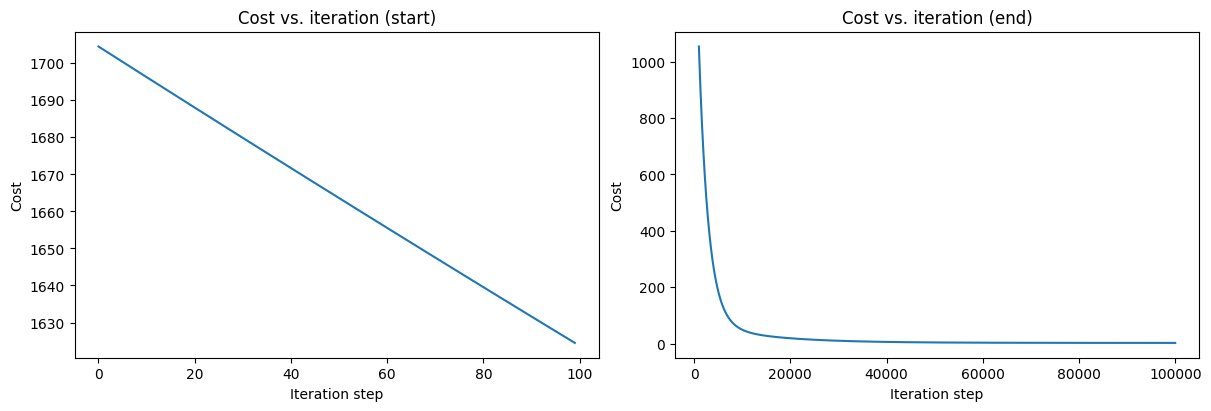

In [66]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration (start)")
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('Iteration step')
ax2.set_xlabel('Iteration step')
plt.show()

In [67]:
y_pred = np.dot(X_test,w_final.T) + b_final

print("Performance Index ")
for i in range(len(X_test)):
    print("Performance Index:", y_pred[i])

Performance Index 
Performance Index: [53.33191416]
Performance Index: [58.58639465]
Performance Index: [59.97457704]
Performance Index: [47.25789058]
Performance Index: [31.11356751]
Performance Index: [78.85954515]
Performance Index: [19.72373725]
Performance Index: [37.50908466]
Performance Index: [80.78546409]
Performance Index: [86.23367064]
Performance Index: [54.73741496]
Performance Index: [66.18319936]
Performance Index: [88.12989916]
Performance Index: [22.68096755]
Performance Index: [39.27550746]
Performance Index: [57.80873986]
Performance Index: [52.16413036]
Performance Index: [41.79926367]
Performance Index: [45.28455937]
Performance Index: [54.01245604]
Performance Index: [43.09920254]
Performance Index: [61.44416268]
Performance Index: [74.05089965]
Performance Index: [41.82683796]
Performance Index: [77.87483716]
Performance Index: [63.12658473]
Performance Index: [53.7265101]
Performance Index: [89.47229628]
Performance Index: [42.48346929]
Performance Index: [82.14

In [68]:
def mean_absolute_error(y_test, y_pred):
    y_test = y_test.ravel()
    y_pred = y_pred.ravel()
    return np.mean(np.abs(y_test - y_pred))
mae = mean_absolute_error(y_test, y_pred)
def mean_squared_error(y_test, y_pred):
    y_test = y_test.ravel()
    y_pred = y_pred.ravel()
    return np.mean((y_test - y_pred)**2)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
def r_squared(y_true, y_pred):
    y_true = y_test.ravel()
    y_pred = y_pred.ravel()
    numerator = np.sum((y_true - y_pred)**2)
    denominator = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (numerator / denominator)
r2 = r_squared(y_test, y_pred)
# Without Regularization the values are in the comment section
print('Mean Absolute Error: ',mae) # 55
print('Mean Square Error: ',mse) # 3017
print('Root Mean Squared Error: ',rmse) # 55
print('R2 Score: ',r2) # -7

Mean Absolute Error:  1.6062609660819702
Mean Square Error:  4.102419648420501
Root Mean Squared Error:  2.025443074593927
R2 Score:  0.988588874670621


/tmp/ipykernel_226171/3749285668.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()
/tmp/ipykernel_226171/3749285668.py:7: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()
/tmp/ipykernel_226171/3749285668.py:13: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_true = y_test.ravel()


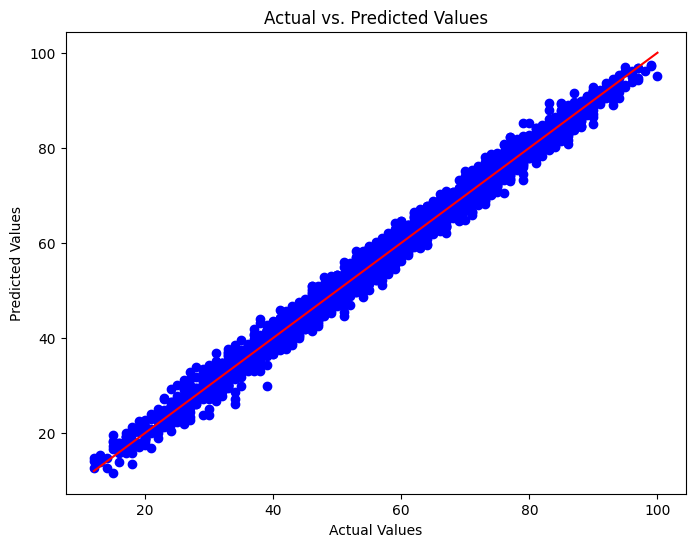

In [69]:
import matplotlib.pyplot as plt

def visualize_predictions(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, color='blue')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red')  # Plotting the y = x line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs. Predicted Values')
    plt.show()

visualize_predictions(y_test, y_pred)

In [93]:
y_pred = y_pred.ravel()
y_test = y_test.ravel()
model_predict = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

/tmp/ipykernel_226171/4132230280.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_test = y_test.ravel()


In [94]:
print(type(model_predict))

<class 'pandas.core.frame.DataFrame'>


In [95]:
model_predict

Actual  Predicted
0       56.0  53.331914
1       58.0  58.586395
2       60.0  59.974577
3       47.0  47.257891
4       26.0  31.113568
...      ...        ...
2495    37.0  37.939634
2496    58.0  58.008886
2497    50.0  51.336138
2498    46.0  45.335060
2499    71.0  72.315448

[2500 rows x 2 columns]

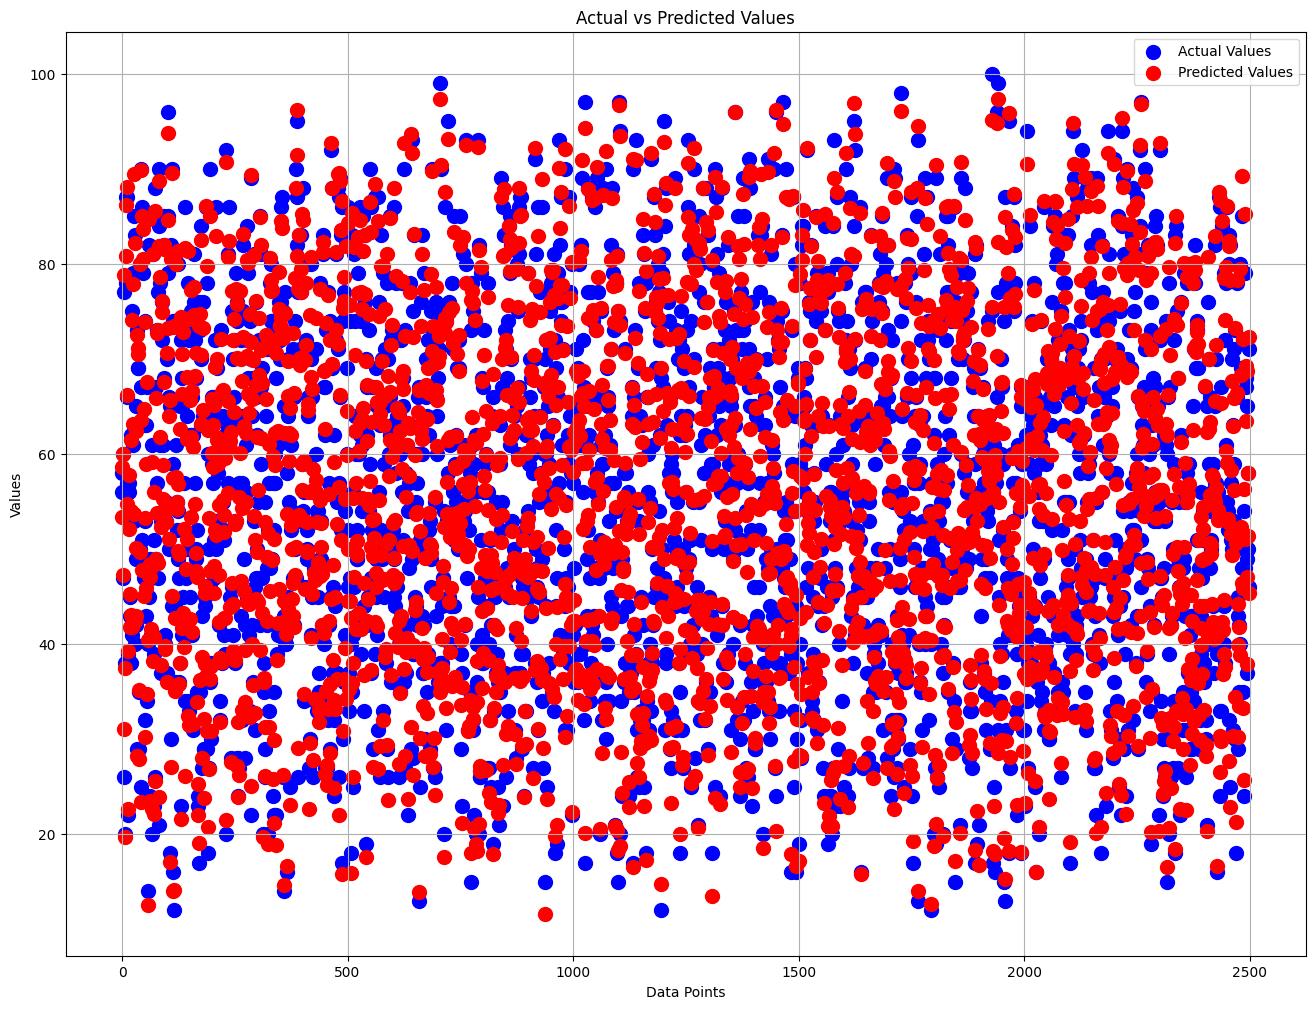

In [99]:
plt.figure(figsize=(16, 12))

# Plot actual values
plt.scatter(model_predict.index, model_predict['Actual'], color='blue', label='Actual Values', s=100)

# Plot predicted values
plt.scatter(model_predict.index, model_predict['Predicted'], color='red', label='Predicted Values', s=100)

# Adding labels, legend, and grid
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()